# <span style="color:blue"> Data Science and Business Analytics </span>
# <span style='background-color:pink'>TASK 1: Prediction using Supervised ML</span>

## Task Description: Predict the percentage of an student based on the no. of study hours.
## This is a simple linear regression task as it involves just 2 variables.


## Submitted by: Soumya Dash, NIT Rourkela



In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [17]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
# Let us check if there is any null value in the Dataset
data.isnull == True

False

So, our data doesn't have any null values. Therefore we can visualise our data now.

The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

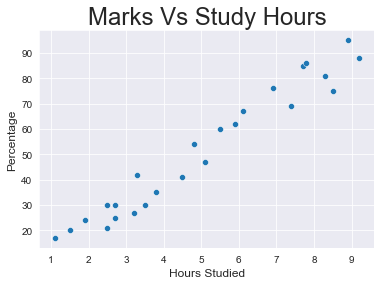

In [20]:
# Plotting our data
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])

plt.title('Marks Vs Study Hours',size=24)
plt.ylabel('Percentage', size=14)
plt.xlabel('Hours Studied', size=14)

plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAEdCAYAAADgjbcLAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAA4lUlEQVR4nO3deVxU9f7H8dcwgAJCk4rLFTVJwK0SF8BCygW10iKXKNfUMs0WvZqCCVaSZC6l9XMtrwWZmZpW9+YSkLiSrddIxT0lU1NQNmGA8/uDmAuyDcphDjOf5+PR4xFzzpnzngE/853v+Z7vV6coioIQQgibYGfpAEIIIWqPFH0hhLAhUvSFEMKGSNEXQggbIkVfCCFsiBR9IYSwIVL0a0FSUhI+Pj6m/7755psqj7ly5QodOnQwHXPu3DnVcxafKyUlRfVzFXvttdfw8fGhf//+Zh8THR2Nj48Pw4cPVy2X0Wjk008/Zfz48QQGBtKpUycCAgIYOnQoS5Ys4cKFC5Uef+LECdWylTR48GB8fHzYvHmzKs+/efNmfHx86N27d5X7njt3rlb/XsXNkaJvATt27DBrn4KCglpIY1mPPfYYAKdPn+bXX3+tcv/CwkL+85//lDq2pl28eJHBgwcTGRnJvn37cHFxoX379jg5OfHbb7+xbNkyBgwYYMpR0qVLl5gyZQozZsxQJZsQt0qKfi2yt7cHICEhAaPRWOm+27dvr41IFnf33Xfj6ekJUG4RvVFSUhIXL16kfv36PPjgg6pkeuGFF0hJSaF3797s2rWL7du389lnn5GQkMC3337LI488QnZ2NjNmzCjzQbV7926+/vpr5J5HoVVS9GtRgwYNaN++PdeuXSMpKanC/dLS0vjuu+9o3759LaaznJCQEAC2bdtWZbH84osvAAgODqZBgwY1nuW7777j559/pkmTJrzzzjs0adKk1PYmTZowf/58/Pz8MBqNrF69usYzCKEmKfq1rF+/fkDlXTzffPMN+fn5DBgwoLZiWdSjjz6KnZ0dqamp/PzzzxXul5uba3rfBg8erEqW3377DQBvb2/q1atX7j52dnYMGTIEgEOHDqmSQwi1SNGvZcUXLOPj4yksLCx3n23btqHT6UwfEBVJSEjghRde4P777+euu+7C19eXBx98kOjoaC5dulRq3+KLbAMHDuT48eOEhoZy1113ERgYSGxsbKXn2bZtGx06dKBdu3Z8+umnpscVReGzzz5j1KhRBAYGctddd/HAAw8wbdo0/vvf/5rzdgDQrFkz/P39Afj3v/9d6evNzMykefPmBAQElNp2+fJloqOjefTRR/H19aVLly48+uijvPPOO6Snp5udpbgL7tdff+Xy5csV7tevXz+2bt1a6v3o3bs34eHhACQnJ5e6AFryImdWVlaZ50tJSTFtv5GiKGzcuJGhQ4fi6+tLjx49CA8P5+LFi2X2jY+Px8fHBz8/P/Ly8srNvmXLFnx8fHjqqacqfiNUkJyczLRp0+jZs6fpwvjEiRPZt29fmX2LBz8U/13cKCEhodwLzL1798bHx4fff/+dqVOn0rlzZ7p3717qGsvOnTt5+umn6dWrF506dSIwMJDnnnuOPXv21OwL1igp+rXszjvvpG3btly6dIkff/yxzParV6+SlJSEr68vTZs2rfB5XnnlFSZOnMiOHTuws7PD29sbNzc3Tp48ydq1axkyZAhpaWlljsvIyGD8+PGkpKTQtm1bMjIyuPPOOys8T2JiItOnT6egoICIiAhCQ0NN2+bMmcPs2bM5ePAgLi4ueHl5kZ2dzVdffcUTTzxh1iilYiW7eCr6MPzyyy+B/30zKHb58mWGDh3K2rVrOXv2LK1bt+Yf//gHx48fZ/ny5Tz++ONcvXrVrBw9evQAID09ndDQUD755BOuXLlSZj9nZ2fatWuHu7u76bFOnTpxxx13mLZ36dKFTp06mXXeihQWFjJt2jReeeUVDh06RLNmzWjcuDGff/45jz/+eJkPtKCgIBo2bMjVq1crLGLFXWSPPvroLWWrjo8//phhw4bx1VdfkZubS7t27bC3tychIYGxY8fy1ltv1ej5Xn75ZbZv384dd9yBXq/nH//4BwCrVq3i+eefZ/fu3djZ2eHj40NhYSFxcXGMHz++ygaQVVCE6g4cOKB4e3srfn5+iqIoyjvvvKN4e3sr8+bNK7Pvpk2bFG9vb2Xt2rVKZmam4u3trXh7eytnz5417RMXF6d4e3srnTt3Vvbv31/q+KSkJKVz586Kt7e3smrVKtPjZ8+eNT1Xv379lL/++ktRFEVJS0tTCgsLFUVRTNuPHj2qKIqiHDx4ULn77rtNeUpKSUlRvL29lYCAACUlJcX0eG5urvLqq68q3t7eSp8+fcx+j7Kysky5Dxw4UGZ7enq60rFjR8Xb21s5efJkqW1vvvmm4u3trbz44otKVlaW6fHff/9dCQ4OVry9vZX33nvP7CxvvPGG6b3w9vZWfHx8lEGDBilz585VvvnmGyUzM7PCY4t/f4899lipx0u+/+Udf/ToUdP2ktatW6d4e3sr3bt3V7777jvT47/99psSFBRkOmbTpk2mbXPnzlW8vb2VqVOnljnPxYsXlfbt2yv33HOPkpGRUeV7Ufx6evXqVeW+JV9jyb/XAwcOKD4+PoqPj4+yYsUKxWg0KoqiKIWFhcrnn3+udOrUSfH29lY2bNhQ6piS/2ZuFB8fX26uXr16Kd7e3kqnTp2UH3/8UVEURcnLy1MyMjKUtLQ0pWPHjspdd91V6r3Mz89Xli9fbvo3lZ2dXeVrrcukpW8BxV08O3fuLLOtuGunsnHr+/btw8HBgZEjR5bp5vDz8+Ohhx4CKh4rPm7cOBo1agSAwWBAp9OV2efXX3/l2Wef5fr164SFhTFmzJhS24vH8vv6+uLl5WV63NHRkRkzZnDfffcREBBQbldGeZydnU2vubwunu3bt2M0GvH19aVNmzblZhk0aBDOzs6mx1u2bMn06dPp3bs3t99+u1k5AMLDwwkLC8PFxQUo6l45evQoMTExPPfcc9x7773MmjWrTBeaGt5//30AwsLC6N69u+nx9u3bM3/+/HKPKf7WFB8fT3Z2dqlt//73vykoKKBPnz7VuhCemppa6l6T8v7r06dPuccuW7YMRVEIDQ3l2WefNXWh6XQ6QkJCmDZtGgBLly6tsWHK/fr1w9fXFwAHBwcaNGjA6dOnMRqNtGnTptR7qdfrmThxIsHBwQwYMKBa3YF1kRR9C2jXrh2tW7cmNTXVdOEQirpe9u3bR+fOnWnWrFmFx8+ePZtffvmFF154odztTk5OAOTk5JS7vXPnzpXmO378OOPHjyczM5OXXnqJsWPHltmnZcuWAOzatYv333+/1M1KTk5OrFmzhqioKFPhNEdxsdqxYwf5+fmlthV37ZR3AbdVq1YALFy4kF27dpXqy+7Xrx/Lly+v1o1cOp2OsWPHkpiYyPz583nwwQdLfWhcv36dTZs28dBDD6l6IffUqVOcO3cOBwcH0wd5SQEBAXh4eJR5vFOnTnh5eZGTk0NcXFypbTfbtePo6EiXLl0q/a+8rqysrCy+//57gAp/B6GhoTg6OnLx4kWSk5Orlasi5f2Nt2jRAr1ez5EjR1i4cCFnz54ttf29994jOjqa5s2b10gGrbK3dABb1a9fP1avXs2OHTvo0KEDAHFxcRiNRrNG7ej1enJzczlw4AAnTpzg3LlznD59muTkZFNfvlLB8MeS/dDlCQ8P5/r16wDl9mdD0fj64OBgdu7cyYIFC1iwYAE+Pj4EBgbSq1cvunbtWqrf3Rz+/v60aNGC1NRU9u/fT8+ePQH4888/OXjwYIVj88eNG8d//vMfTp06xYQJE3BycqJbt2707NmTPn36lFsYzdGgQQNCQkIICQlBURRSUlLYs2cPW7du5ejRo1y7do3nn3+enTt34ujoeFPnqMyZM2eAomJVv379cvep6O7XRx55hEWLFvHvf/+bQYMGAXDy5EmSk5Np3Lgx9913X7WyuLu788knn1S6z7lz58q09s+ePUt+fj4ODg6lvhGW5OTkhKenJ0eOHOH06dPcfffd1cpWUd7yHhs1ahRr165l9erVrF69mjvuuIPAwEDuv/9+evTogYODwy2fW+ukpW8hxSNzSnbxbN++vcquHSi6uLd8+XJ69erFM888w5tvvklsbCwHDx6kbdu2dO3atdLjKxqKWOz69eumDB9//HGFwyiXLFlCREQE7dq1A+Do0aN88MEHjBw5kr59+1brQi4UtbCLC1TJG7W+/PJLFEWhb9++uLq6ljmuZcuWbN26ldDQUG6//XZycnLYvXs38+bNo0+fPkyYMKHKaRPMyebj48P48ePZunUrL7/8MlD0gZSYmHhLz12RjIwM4H/f3Mrj5uZW7uPFF7v37Nlj6q7YunUrAAMHDkSv19ds2AoUd+85OTlV2ggo7pYztzuwKhX9jYeHh7NgwQJ8fX3R6XScPn2a2NhYnnnmGXr27MmGDRtq5PxaJkXfQu6++27TCJOTJ0+SmZnJnj176Ny5c5VfL5csWcI777xDZmYmI0eOZOnSpXz99df8+OOPxMbG0q1bt1vKNmHCBJYuXcqgQYMoLCwkIiKi3DuI9Xo9I0eOZOvWrXz77bdER0czcOBAGjRoQGpqKi+++KJZUyuUVDy1wjfffGPqpinu2qls2oVmzZrx+uuvs2/fPjZs2MDUqVPp2rUrOp2OXbt2MXHixCpv/MrMzGTw4MEEBQVV+iGh0+l4+umnTR92p0+frs5LLDdH8TerkooL+o398lUdB9C0aVMCAgIwGo2mhkXxB2ltjtop7t7LycmpcFQWFL33QKlrMpWpqOvSHI888gjr169n7969LF68mCFDhtCwYUPS0tKIiIiodmOlrpGib0HBwcFAUYH79ttvycvLq7Jrx2g08tFHHwEQFRVFREQE/fv3x9PT03SB7M8//7ylXMWt7fDwcG677TZSUlJYuXJlqX0yMzP573//S2pqKgDNmzdn8ODBLFq0iG+//RZvb28KCgoqHXdfnjvuuANfX1+uXbvG/v37OXXqFEePHqVp06bce++95R5z/vx59u3bh6Io2NnZcc899zBx4kTWrVvHv/71L6Dopqvjx49Xeu7ii30XLlwod+z4jRo3bgwUXQyvSvHvBih3/Hx5Y+6Lp6c4d+6cqSjeqLKJ3YqL+zfffMPx48f5/fff8fLyMnUn1oaWLVtib2+P0WiscCK/7OxsTp06BUDr1q0BTN9EKrrX4GYuoufk5PDbb7+Z3rNGjRrx8MMPM2/ePHbt2mX6+yq+7mGtpOhbUHEXT3x8PDt27DDrhqwrV66YWn7lTdNw+fJlvv32W4AyF0Orq1GjRvzzn/8EYOXKlaUKzFtvvcWwYcPKfBgAuLq6mi7qVda6q0hxsYqLizO1Um8cm18sLy+PgQMHMnbsWH755Zcy27t162bqpzVnZEjxNYPly5dXOorj4sWL/Pjjj+j1+lIjqCrqwijZDVNc4EqKj48v81jLli1NH56bNm0qsz05ObnSGVH79euHs7Mz+/fv5+uvvwaKWrm1ycXFxfTNs6JrAhs2bMBoNGIwGOjYsSMAt912G1D0gVBeI6a896sqMTExPPbYY8ybN6/MNkdHR1O36M38zdYlUvQtqGvXrri7u/PLL7+QmJjIPffcY7qJpCKNGjUyFZA1a9aUagkdPnyY8ePHm25Eys3NveWMoaGh+Pr6kpeXx+zZs01dE8XfBjZu3MjWrVtLdVl89913bNu2DSi6Wai6Hn74YRwdHYmPjzd91a6oa8fR0dH0QTl79uxSBTUvL4/FixdjNBpp0aIFbdu2rfLckyZNomHDhpw5c4bQ0FDi4+NLdW0VFhayf/9+xowZQ3Z2Nk888USpC8XF3RMXL14s9btxdnY23W379ttvm/rr8/Pz+eijj/j888/LzVM8Qmvx4sWluh1Onjxp+kCuiLOzM/369SM3N5c1a9ZgZ2dn+r3Vpueeew47Ozs+/fRTVq1aZWqMKIrCli1bWLRoEQAvvvii6QPa09PT9A3qzTffNP0t5+bmsmjRIg4cOFDtHA8++CB6vZ49e/awevXqUo2ilJQU093VN/M3W5fI6B0L0ul0BAcHs27dOnJycswatWNvb8/kyZOJjo429aV7eHhw9epV0ygOf39/02yUNZHx1VdfZciQIfz444+sW7eOESNG0L17d8aOHcu//vUvZsyYwfz582nevDlpaWmmLp/Q0NBqjxKBolZx79692bZtG5cuXaJz586mro7yzJw5kx9++IFjx47x8MMP07JlS1xcXDh79izXrl2jXr16zJs3r1QXS0U8PDx4//33mTp1KqdPn2bSpEm4uLjg4eGBvb09qamppm8AISEhzJo1q9TxXl5e6HQ6Ll26RP/+/WnWrJmphfviiy/ywgsvcPDgQe6//37uuOMOzp8/z5UrVxgzZgybN282fRgU69evH+PGjWPNmjVMnjyZVq1a4ezsTEpKCm5ubvj6+vLTTz9V+HpCQkLYsmUL2dnZBAQEWGQ4or+/P6+88gpvvPEGixYt4oMPPqBVq1acP3/e1E0zZswYRowYYTpGr9fz/PPPExUVxddff83+/ftp0aIFv//+OxkZGbzwwgu8++671crRsmVLwsPDiYqKYuHChaxevRoPDw+ysrI4c+YMiqLwwAMPqDavk1ZIS9/CSnbnmLuQyFNPPcWKFSvo3r07er2elJQU8vLy6Nu3Lx9++CHLly/HwcGBY8eOlRmLfDPatWvH6NGjgaIWZ/FFzpkzZ/Lmm2/i5+dHQUEBR44cITs7m549e7J06VJef/31mz5nyZZ9VfPmGwwG1q9fz7hx42jTpg1//vknx44dw83Njccff5wvv/yyzE1slenYsSNfffUVc+fOpU+fPtx+++2cPXuWEydO4OrqSkhICB999BHz588v80HSpk0boqKiaNWqFZcuXeLs2bP89ddfAKbfT8+ePbGzs+PkyZN4eHjw1ltvlfnwKGnmzJm89957dOvWjbS0NP744w969+7Nhg0bqizi/v7+puk8avMC7o1GjhzJp59+ysMPP4yDgwOHDx/Gzs6O/v37s3bt2nJf/6hRo0yvOy8vj9OnT9O+fXtWrVpl+nusrlGjRrFs2TKCgoLQ6/UcPXqUtLQ0unXrRlRUFMuXLzercVCX6ZSqhjQIIeqs7Oxs7rvvPhRFYc+ePapMRy3qFmnpC2HFvv76a7KzsxkwYIAUfAFIn74QVufMmTPo9XpOnjxpmr1y5MiRFk4ltEKKvhBWZsOGDaaJ2gCGDBlyy1M8C+shRV8IK9OxY0caNGiAvb09AwcOZObMmZaOJDRE0xdyCwsLKSgwP55er6vW/rVFi7m0mAm0mUuLmUCbubSYCWwvl4NDxXMrabqlX1CgkJ5e8bwjNzIYnKu1f23RYi4tZgJt5tJiJtBmLi1mAtvL5e5edmLCYjJ6RwghbIgUfSGEsCFS9IUQwoZI0RdCCBsiRV8IIWyIFH0hhFCbDi5dz+fw5WwuXS8AneWiaHrIphBC1Hk6OHDuGi9v+i/XjYXUd7BjwZC7CfAof31jtUlLXwghVHQpJ99U8AGuGwt5edN/uZRzayvb3Swp+kIIoaK/svJMBb/YdWMhf2WVv/6v2qToCyGEihq71KO+Q+lSW9/BjsYujhbJI0VfCCFU5O6kZ8GQu02Fv7hP393JMpdU5UKuEEKoSYEADzc2Twjgr6w8Grs4FhV8C83/JkVfCCHUpoB7fXvc69ubfrYU6d4RQggbIkVfCCFsiBR9IYSwIVL0hRDChkjRF0IIG6La6J28vDzCw8M5e/YsDRo0IDIyEp1OR1hYGDqdDi8vL+bMmYOdnXzuCCFEbVGt6G/YsAFnZ2c2bNjAyZMnmTt3Lg4ODkyZMgV/f38iIyOJi4sjODhYrQhCCCFuoFoz+/jx4wQFBQHg6enJiRMnSE5Oxs/PD4CgoCD27dun1umFEEKUQ7WWfvv27UlISKBv37788ssvXLhwgUaNGqHTFU0k7eLiQkZGRqXPodfrMBiczT6nXm9Xrf1rixZzaTETaDOXFjOBNnNpMRNIrpJUK/pDhgzhxIkTjB49mi5dutCxY0cuXrxo2p6VlYWbW+XzSRcUKKSnZ5t9ToPBuVr71xYt5tJiJtBmLi1mAm3m0mImsL1c7u6uFW5TrXvn0KFDdO3alZiYGPr27UvLli3p0KEDSUlJACQmJtKtWze1Ti+EEHWTyqtsqdbSb926NUuWLGHNmjW4urryxhtvkJ2dTUREBIsXL8bT05P+/furdXohhKh7Kltlq4bm69EpimLBqX8qZzQWSPeOSrSYCbSZS4uZQJu5tJgJ6k6uS9fzGbzqQKlFV+o72LF5QsD/Jmszg0W6d4QQQlRPbayyJUVfCCE0ojZW2ZKiL4Sou1S+6FnbamOVLVlERQhRN9XCRc9aVwurbElLXwhRJ13KyTcVfCjq+35503+5lJNv4WS36O9Vtto3ci66eFvDH2BS9IUQdcvfXTpn0nNUv+hpjaToCyHqjr+7dAavOkDy+QzVL3paIyn6Qog6o2SXzqYfzvFiby9VL3paI3l3hBB1Rslx7OevXifmwBnGB3rS6R+utDY41fhFT2skLX0hRJ1x4zj281ev88Gek0UFX4WLntZIir4Qos6ojXHs1k7eKSFE3VEL49itnRR9IUTd8vc4dtMEZFLwq0W6d4QQwoZI0RdCCBsiRV8IIcDqJm+riPTpCyGENU7eVgFp6QshbJ7VTt5WDtVa+kajkbCwMFJTU7Gzs2Pu3LnY29sTFhaGTqfDy8uLOXPmYGcnnztCCMuqbMWq6ixTWBeoVnF37dpFfn4+69evZ/LkybzzzjtER0czZcoU1q1bh6IoxMXFqXV6IYQwW22sWKUVqn2EtWnThoKCAgoLC8nMzMTe3p6ff/4ZPz8/AIKCgti7dy/BwcEVPoder8NgcDb7nHq9XbX2ry1azKXFTKDNXFrMBNrMpcVMUHUut0KFRcM6M+2zn019+ouGdebOJq7Y2al3RdcS75dqRd/Z2ZnU1FQefPBB0tLSWLFiBQcPHkSnK3oDXVxcyMjIqPQ5CgqUaq1gX1dWvNcCLWYCbebSYibQZi4tZgLzcvn9o0GZO32vXcuxeK6b4e7uWuE21Yr+2rVrCQwMZNq0aZw/f54xY8ZgNBpN27OysnBzc1Pr9EIIUT02cqevan36bm5uuLoWfdrcdttt5Ofn06FDB5KSkgBITEykW7duap1eCCFEOVRr6T/11FPMmjWL4cOHYzQamTp1Kp06dSIiIoLFixfj6elJ//791Tq9EEKIcqhW9F1cXFiyZEmZx2NjY9U6pRBCiCrIIHkhhLAhUvSFEDfHRuaqsTbWdauZEKJ2VDBXTT9XJ0snE1WQlr4QotoqmqvmbLq649rFrZOiL4SotormqrmYkWuhRLXASrqzpHtHCFFtxXPVlCz89R3saOJaz4KpVGRFUy9LS18IUW3uTnoWDLnbNElZcRFsabDOPn1rmnpZWvpCiOpTIMDDrcxcNWpOTmZJ1jT1ct1KK4TQDhuZqwYq7s6qi1MvS/eOEEJUoaLuLHenutdurnuJhRCitlXQnVUXv91I0RdCCHNYSXeWdO8IIYQNkaIvhBA2RIq+EELYECn6QghhQ6ToCyGEDVFt9M7mzZv5/PPPAcjNzeXw4cOsW7eOefPmodPp8PLyYs6cOdjZyeeOEELUFtUq7uDBg4mJiSEmJoaOHTsye/Zs/u///o8pU6awbt06FEUhLi5OrdMLIYQoh+rN7EOHDnH8+HFCQ0NJTk7Gz88PgKCgIPbt26f26YUQWmclUxbXFarfnLVy5UomT54MgKIo6HRFv1EXFxcyMjIqPVav12EwOJt9Lr3erlr71xYt5tJiJtBmLi1mAm3mqm6mwkKFb45eYtpnP5umLF40rDN9fdxrdPI2Lb5XYJlcqhb9a9eucfLkSQICAgBK9d9nZWXh5uZW6fEFBQrp6dlmn89gcK7W/rVFi7m0mAm0mUuLmUCbuaqb6dL1fFPBh6KZK6d99jObJwTU6OyVWnyvQL1c7u6uFW5TtXvn4MGD3HvvvaafO3ToQFJSEgCJiYl069ZNzdMLITSusimLhTpULfqnTp3Cw8PD9PPMmTN59913CQ0NxWg00r9/fzVPL4TQuOIpi0uqq1MW1xWqdu88/fTTpX5u06YNsbGxap5SCNujK1rZqWj2x3q4O+nrzGRgxVMW37gMYV2dwbIukFk2hajL6vrarVY0ZXFdIXdGCVGHWcXarX9PWdy+kXPRxVsp+KqSoi9EHSYXQkV1mVX0s7KyeO211xgzZgzp6elERkaSlZWldjYhRBXkQqioLrOKflRUFG5ubly+fJl69eqRmZlJZGSk2tmEEFWwprVbRe0w6y/j8OHDREdHs2vXLpycnFi4cCEDBw5UO5sQoipyIVRUk1lF/8aZMAsKCmR2TCG0wkrWbhW1w6yi3717dxYsWMD169fZvXs3H3/8Mf7+/mpnE0IIUcPMaq5Pnz4dZ2dnXF1defvtt/Hx8WHGjBlqZxNCCFHDzGrpOzg4MHnyZNNsmUIIIeoms4p+7969TVMiA+h0OpycnPDy8iIsLIwmTZqoFlAIIUTNMavo9+3bl6ysLEaMGIGdnR0bN24kKysLHx8fIiMjWbFihdo5hRBC1ACz+vS///573njjDTp06EC7du2YPXs2x44d46mnniI1NVXtjELYNllZStQgs1r6WVlZZGZm0qBBAwAyMzO5fv26qsGEEFQ+oZoQN8Gsoj9kyBAef/xxBgwYgKIo7Nixg2HDhhETE4Onp6faGYWwWRVNqLZ5QgCG2ywcTtRJZhX9CRMm0L59exITE7G3tyciIoKAgAB+/fVXHnvsMbUzCmGzKptQzctCmUTdZvYEHXfddRdt27ZFURQKCgrYu3cv9913n5rZhLB5xROqlSz8MqGauBVmFf0lS5awatWqogPs7cnLy6Nt27Z8+eWXlR63cuVK4uPjMRqNPPnkk/j5+REWFoZOp8PLy4s5c+bIdA7CNtzk6laVriwlxE0w6y9n69atJCQk8OabbzJjxgwOHDjArl27Kj0mKSmJn376iU8++YScnBzWrFlDdHQ0U6ZMwd/fn8jISOLi4ggODq6RFyKEZt3K6lYyoZqoYWY1sxs2bEiTJk3w9PTkyJEjhISEkJKSUukxe/bswdvbm8mTJzNx4kQeeOABkpOT8fPzAyAoKIh9+/bd+isQQuNueXUrWVlK1CCzWvr29vb8/vvveHp68v333xMYGEhubm6lx6SlpfHHH3+wYsUKzp07x6RJk1AUxXRnr4uLCxkZGZU+h16vw2BwNvOlgF5vV639a4sWc2kxE2gz161mOnYmrdyLsem5BXg1u/mhl9b4XqlFcv2PWUX/2WefJSIiguXLl7NkyRK2bNnCAw88UOkxBoMBT09PHB0d8fT0pF69evz555+m7VlZWbi5Vf4HX1CgkJ6ebU7Ev8/pXK39a4sWc2kxE2gz161mMtSzL/dirKGe/tae1wrfK7XYWi53d9cKt5nVvdOhQwc+/PBDnJ2d2bJlC++//z6jR4+u9JiuXbuye/duFEXhwoUL5OTk0KNHD5KSkgBITEykW7du1XgZQtRNsrqV0JJK/+rS09MBeOaZZ4iJiUFRijoTGzduzMiRI9m2bVuFx/bq1YuDBw8ydOhQFEUhMjISDw8PIiIiWLx4MZ6envTv37/mXokQWiUXY4WGVFr0p02bxt69ewFKLZpib29vVsEub8792NjY6mYUou6T1a2ERlRa9D/44AMAwsPDiY6OrpVAQggh1GNWp2J0dDSpqalcvXrV1MUD0LFjR9WCCSGEqHlmFf2lS5fywQcf0KhRI9NjOp2OuLg41YIJIYSoeWYV/S1btrBjxw6aNm2qdh4hhBAqMmvIZvPmzaXgCyGEFTCrpd+jRw/eeust+vTpQ/369U2PS5++EELULWYV/c2bNwOUGpcvffpCCFH3mFX04+Pj1c4hhGXc5JTHQtRVZvXpZ2Vl8frrrzNmzBjS09OJjIwkKytL7WxCqOvvKY8HrzrA6LXfM3jVfg6cuyYLjwurZlbRj4qKwtXVlcuXL1OvXj0yMzOJjIxUO5sQqrrlKY+FqIPMKvqHDx9m6tSp2Nvb4+TkxMKFCzl8+LDa2YRQVWXrzwphrcwq+jcuaVhQUCDLHIo6r3j92ZJk/Vlh7cyq3N27d2fBggVcv36d3bt38/zzz5eagE2IukimPBa2yKy/7unTp7Nq1SpcXV15++236dmzJ88995za2YRQl0x5LGyQWUXfwcEBPz8/Jk+eTHp6Ot9//z316tVTO5sQ6pMpj4WNMat75+2332bp0qUAXL9+nVWrVrFs2TJVgwkhhKh5ZhX9uLg41qxZA0CzZs2IjY3lP//5j6rBhBBC1Dyzir7RaMTBwcH0s4ODAzqd3MEihBB1jVl9+l26dGHatGkMHToUnU7Hli1buOeee6o8LiQkBFfXolXZPTw8mDhxImFhYeh0Ory8vJgzZ44M/RRCiFpkVtGPiIhg6dKlREdHY29vT48ePXj++ecrPSY3NxeAmJgY02MTJ05kypQp+Pv7ExkZSVxcHMHBwbcQXwghRHWYVfSXL19OWFhYtZ74yJEj5OTkMG7cOPLz8/nnP/9JcnIyfn5+AAQFBbF3795Ki75er8NgcDb7nHq9XbX2ry1azKXFTKDNXFrMBNrMpcVMILlKMqvof/vtt0ybNq1aT1y/fn3Gjx/PsGHDOH36NM888wyKopiuBbi4uJCRkVHpcxQUKKSnZ5t9ToPBuVr71xYt5tJiJtBmLi1mAm3m0mImsL1c7u6uFW4zq+h7eHgwbtw4unTpgouLi+nxsWPHVnhMmzZtaN26NTqdjjZt2mAwGEhOTjZtz8rKws3NzZzTCyGEqCFmFX2DwQBAamqq2U+8ceNGUlJSePXVV7lw4QKZmZncd999JCUl4e/vT2JiIgEBATcVWgghxM3RKYpi9j2I165dM7t1npeXR3h4OH/88Qc6nY7p06dz++23ExERgdFoxNPTk6ioKPR6fYXPYTQWSPeOSrSYCbSZS4uZQJu5tJgJbC/XLXfvnDp1ismTJ5ORkcHGjRt56qmneO+997jzzjsrPMbR0ZFFixaVeTw2NtacUwqhPbLKlrACZg2Snzt3Lq+88gqNGjWiadOmjBw5UhZREbZFVtkSVsKsop+ens59991n+nnEiBFkZmaqFkoIrZFVtoS1MPt22NzcXNNwy0uXLlFYWFjFEUJYD1llS1gLs4r+8OHDGT9+PJcvX2bRokWEhoby5JNPqp1NCM2QVbaEtaiy6KekpODm5sZLL73EoEGDyM/PZ+7cuQwfPrw28gmhCbLKlrAWlf7Fbtq0ifnz59O6dWt+//13Fi5cSM+ePWsrmxDaIatsCStRadGPiYnhyy+/pGnTpvz000+mpRKFsEmyypawAlV27zRt2hQAX19f0tLSVA8khBBCPZUW/RsXSqns7lkhhBDaV60VTGS1LCGEqNsq7dM/evQoXbp0Mf18/fp1unTpYpoi+ccff1Q9oBBCiJpTadHfuXNnbeUQQghRCyot+i1atKitHEKLZIIxIayO3Fkiyvf3BGPF880U34wU4OEmhV+IOqxaF3KF7aizE4zp4NL1fA5fzubS9QKZBVOIG0hLX5SrsgnGTDcnaY18OxGiStLSF+WqixOM1dlvJ0LUIlWL/uXLl7n//vs5ceIEZ86c4cknn2T48OHMmTNHpmbWuLo4wZhMfyxE1VQr+kajkcjISOrXrw9AdHQ0U6ZMYd26dSiKQlxcnFqnFjWhxARjHz3Vjc0TAjTfTVIXv50IUdtUK/rz58/niSeeoEmTJgAkJyfj5+cHQFBQEPv27VPr1KKm/D3BWPtGzkX9+Bou+FA3v50IUdtU+dewefNmGjZsSM+ePVm1ahWA6S5eABcXFzIyMqp8Hr1eh8HgbPZ59Xq7au1fW7SYS4uZ4NZz9XN1ov3zgVzMyKWJaz1aGpyws7u1ITzW+l6pQYuZQHKVpErR37RpEzqdjv3793P48GFmzpzJlStXTNuzsrJwc3Or8nkKChTS07PNPq/B4Fyt/WuLFnNpMRPUTK7b7OC22+oBcO1ajiYyqUGLubSYCWwvl7u7a4XbVCn6H3/8sen/R40axauvvsqCBQtISkrC39+fxMREAgIC1Di1EEKIStTakM2ZM2fy7rvvEhoaitFopH///rV1aiGEEH9T/QpXTEyM6f9jY2PVPp0QQohKyM1ZQghhQ6ToCyGEDZGiL4QQNkSKvhBC2BAp+qJ2yJTHQmiC3J8u1CdTHguhGdLSF6qTKY+F0A4p+kJ1MuWxENohRV+oTqY8FkI7pOgL1cmUx0Joh/yrE+orsSDLX1l5NHZxLCr4chFXiFonRV/Ujr8XZDEtqi4FXwiLkO4dIYSwIVL0hRDChkjRF0IIGyJFXwghbIgUfSGEsCGqjd4pKChg9uzZnDp1Cr1eT3R0NIqiEBYWhk6nw8vLizlz5mBnJ587VdIVTWVQNNyxHu5O+tKjX6rabqlcQgjNUa3oJyQkALB+/XqSkpJMRX/KlCn4+/sTGRlJXFwcwcHBakWwDlVNVmapycxkEjUh6iTVmtl9+/Zl7ty5APzxxx80btyY5ORk/Pz8AAgKCmLfvn1qnd5qVDVZmaUmM5NJ1ISom1S9Ocve3p6ZM2eyc+dOli5dSkJCAjpd0UTqLi4uZGRkVHq8Xq/DYHA2+3x6vV219q8tt5Lr2Jm0cicrS88twKuZW5Xb1chkTq6bpcXfoRYzgTZzaTETSK6SVL8jd/78+UyfPp3HH3+c3Nxc0+NZWVm4uVVeHAoKFNLTs80+l8HgXK39a8ut5DLUs6e+g12pAlvfwQ5DPT3p6dlVblcjkzm5bvp5Nfg71GIm0GYuLWYC28vl7u5a4TbVune2bNnCypUrAXByckKn09GpUyeSkpIASExMpFu3bmqd3mpUNVmZpSYzk0nUhKibdIqiqHLZLTs7m/DwcP766y/y8/N55plnuPPOO4mIiMBoNOLp6UlUVBR6vb7C5zAaC2y+pQ/cMEqmnMnKqtquRqabPG9VtPg71GIm0GYuLWYC28tVWUtftWaZs7MzS5YsKfN4bGysWqe0XlVNVmapycxkEjUh6hwZJC9KkwXMhbBq0gEr/kfG3gth9aSlL0xk7L0Q1k+KvjCRBcyFsH5S9IWJLGAuhPWTom8Naujiq4y9F8L6yb/muq4mL77KAuZCWD1p6dckCwx3rPGLr3+PvW/fyLlo/L0UfCGsirT0a0plLW4VVXbx1XTTlBBC/E1a+jXEUsMd5eKrEKI6pOjXEEsNd5SLr0KI6pDKUEOKW9w3TjWseotbLr4KIapBWvo1xKItbrn4KoQwk7T0a4q0uIUQdYAU/ZokUw0LITROunfqApnuWAhRQ6Slr3Uy3bEQogZJS/9GGmtVy3THQoiapFpL32g0MmvWLFJTU8nLy2PSpEm0bduWsLAwdDodXl5ezJkzBzs7DX3uaLBVLXfcCiFqkmoV94svvsBgMLBu3TpWr17N3LlziY6OZsqUKaxbtw5FUYiLi1Pr9DdFi61queNWCFGTVGsqDhgwgP79+5t+1uv1JCcn4+fnB0BQUBB79+4lODi4wufQ63UYDM5mn1Ovt6vW/jc6diat3FZ1em4BXs1ufg6dW8nlVqiwaFhnpn32s+nbx6JhnbmziSt2djff93Sr75VatJhLi5lAm7m0mAkkV0mqFX0XFxcAMjMzefHFF5kyZQrz589Hp9OZtmdkZFT6HAUFCunp2Waf02Bwrtb+ZY6vZ1/uXbWGevpbe95bzOX3jwZlxv9fu5Zz089XE5nUosVcWswE2sylxUxge7nc3V0r3KZqh/r58+cZPXo0jz76KIMGDSrVf5+VlYWbm7ozUFaXZuexkTtuhRA1RLVq9tdffzFu3DgiIyPp0aMHAB06dCApKQl/f38SExMJCAhQ6/Q3R+6qFUJYOdWK/ooVK7h27RrLli1j2bJlALzyyitERUWxePFiPD09S/X5a4bcVSuEsGI6RVE0W9aMxoKb69PXFY3EKWqt18PdSW/R4q3F/kQtZgJt5tJiJtBmLi1mAtvLVVmfvvUN9NbgWHshhNAKDd0ZVTO0ONZeCCG0wuqKvqVWsBJCiLrA6oq+3MEqhBAVs7qir9mx9kIIoQHWVwllrL0QQlTI+oo+yFh7IYSogNV17wghhKiYFH0hhLAhUvSFEMKGSNEXQggbIkVfCCFsiKYnXBNCCFGzpKUvhBA2RIq+EELYECn6QghhQ6ToCyGEDZGiL4QQNkSKvhBC2BAp+kIIYUOsZpbNX375hYULFxITE2PpKAAYjUZmzZpFamoqeXl5TJo0iT59+lg6FgUFBcyePZtTp06h1+uJjo6mVatWlo4FwOXLlxk8eDBr1qzhzjvvtHQcAEJCQnB1LVpk2sPDg+joaAsngpUrVxIfH4/RaOTJJ59k2LBhlo7E5s2b+fzzzwHIzc3l8OHD7N27Fzc3N4vmMhqNhIWFkZqaip2dHXPnzrX431ZeXh7h4eGcPXuWBg0aEBkZyR133FFr57eKor969Wq++OILnJycLB3F5IsvvsBgMLBgwQLS0tJ47LHHNFH0ExISAFi/fj1JSUlER0ezfPlyC6cq+scZGRlJ/fr1LR3FJDc3F0AzDQmApKQkfvrpJz755BNycnJYs2aNpSMBMHjwYAYPHgzAa6+9xpAhQyxe8AF27dpFfn4+69evZ+/evbzzzju8++67Fs20YcMGnJ2d2bBhAydPnmTu3Ll88MEHtXZ+q+jeadWqlcV/kTcaMGAAL730kulnvV5vwTT/07dvX+bOnQvAH3/8QePGjS2cqMj8+fN54oknaNKkiaWjmBw5coScnBzGjRvH6NGj+fnnny0diT179uDt7c3kyZOZOHEiDzzwgKUjlXLo0CGOHz9OaGiopaMA0KZNGwoKCigsLCQzMxN7e8u3c48fP05QUBAAnp6enDhxolbPb/l3oAb079+fc+fOWTpGKS4uLgBkZmby4osvMmXKFMsGKsHe3p6ZM2eyc+dOli5dauk4bN68mYYNG9KzZ09WrVpl6Tgm9evXZ/z48QwbNozTp0/zzDPPsG3bNosWjrS0NP744w9WrFjBuXPnmDRpEtu2bUOn01ksU0krV65k8uTJlo5h4uzsTGpqKg8++CBpaWmsWLHC0pFo3749CQkJ9O3bl19++YULFy5QUFBQaw1Dq2jpa9X58+cZPXo0jz76KIMGDbJ0nFLmz5/P9u3biYiIIDs726JZNm3axL59+xg1ahSHDx9m5syZXLp0yaKZoKiV+Mgjj6DT6WjTpg0Gg8HiuQwGA4GBgTg6OuLp6Um9evW4cuWKRTMVu3btGidPniQgIMDSUUzWrl1LYGAg27dvZ+vWrYSFhZm67SxlyJAhNGjQgNGjR5OQkEDHjh1rtSdAir5K/vrrL8aNG8fLL7/M0KFDLR3HZMuWLaxcuRIAJycndDqdxbuePv74Y2JjY4mJiaF9+/bMnz8fd3d3i2YC2LhxI2+++SYAFy5cIDMz0+K5unbtyu7du1EUhQsXLpCTk4PBYLBopmIHDx7k3nvvtXSMUtzc3EwX4m+77Tby8/MpKCiwaKZDhw7RtWtXYmJi6Nu3Ly1btqzV81tF944WrVixgmvXrrFs2TKWLVsGFF1wtvSFyn79+hEeHs6IESPIz89n1qxZ1KtXz6KZtGro0KGEh4fz5JNPotPpmDdvnsX7hHv16sXBgwcZOnQoiqIQGRlp8Q/tYqdOncLDw8PSMUp56qmnmDVrFsOHD8doNDJ16lScnZ0tmql169YsWbKENWvW4OrqyhtvvFGr55eplYUQwoZI944QQtgQKfpCCGFDpOgLIYQNkaIvhBA2RIq+EELYECn6ok7w8fEpcxPS5s2befbZZ2s9S2ZmJrNnz2bQoEE88sgjhISE8Nlnn5m2f/bZZ3z88cfVft6BAweSlJTEhQsXeOKJJ276eCEqI+P0haimRYsW4ezszBdffIFOp+PChQuEhobSvHlzAgMD+eGHH/Dy8rrp52/atCnr16+vwcRC/I8UfWEVMjIyeO211zhy5Ag6nY6ePXvyz3/+E3t7e3x8fNi/fz8NGzYEMP187Ngx3njjDZydncnKymLdunW88sornDlzBjs7Ozp27Mjrr7+OnV3pL8SXLl2iUaNGGI1GHB0dadq0Ke+++y4Gg4GdO3cSHx/P3r17qV+/PleuXCEtLY3IyEgA3n33XdPPx48fZ9asWeTk5ODp6WmaDuPcuXMMGjSIn376CYDly5ezY8cOCgsLadGiBXPmzKFp06YVHi9EZaToizpjzJgxpQrw1atX8fHxASAqKgqDwcCXX36J0Whk0qRJrFmzhgkTJlT6nMeOHeObb76hRYsWbNmyhaysLLZu3UpBQQFz5szh7NmztG7dutQxzz//PC+99BIBAQH4+vrSpUsXHnroIVq2bEnLli2Ji4vDy8uLESNGVDr76/Tp0xkxYgTDhg3jhx9+YMSIEWX22bJlCykpKXz22WfY29vz6aefMnv2bFavXm3W8ULcSIq+qDM+/PBDU2sdivr0t2/fDkBiYiKffPIJOp0OR0dHnnjiCT788MMqi37z5s1p0aIFUDSvzdtvv82oUaO49957GTNmTJmCD9CuXTu2bdtGcnIyBw8eZO/evaxYsYIlS5bQu3dvs15LWloaR48eJSQkxHTu8rqEEhISOHToEEOGDAGgsLCQnJwcs48X4kZyIVdYhcLCwlLTCxcWFpKfn19mv7y8vFI/l5yHpWXLluzcuZMJEyaQmZnJ2LFjiY+PL7V/fn4+kZGRXL16lU6dOjF27Fjef/99Jk2axKefflrmfDqdjpIznRiNxlLbS24rb16fwsJCnn76abZu3crWrVvZtGkTn3zyidnHC3EjKfrCKgQGBhIbG4uiKOTl5bFhwwbTjI8NGzbk0KFDAHz11VcVPse6desIDw8nMDCQl19+mcDAQH777bdS+9jb23Pq1CmWLVtmKuD5+fmcOHGCDh06AEUL5hR/4Nx+++0kJyejKAqZmZmmlctuv/12OnbsaBr1k5ycTEpKSrmva+PGjWRmZgKwZMkSZsyYYfbxQtxImgbCKsyePZuoqCgGDRqE0WikZ8+eTJw40bTt9ddfx83NjXvvvbfC6ZFDQkL47rvveOihh3BycqJ58+aMGjWqzH5LlixhwYIF9O/fHycnJwoLCwkODjYtHhIUFGSaknn48OHs3r2bfv360bRpU/z8/Eyt88WLFxMeHs769etp1aoVnp6eZc41bNgwLly4wOOPP45Op6N58+am5zbneCFuJLNsCiGEDZHuHSGEsCFS9IUQwoZI0RdCCBsiRV8IIWyIFH0hhLAhUvSFEMKGSNEXQggb8v8IlT3Whd7CxgAAAABJRU5ErkJggg==

#### From the above scatter plot there looks to be correlation between the 'Percentage' and 'Hours Studied'. Plotting a regression line can confirm the correlation.

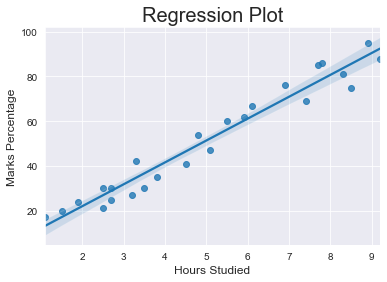

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
# Plot data and a linear regression model fit.

plt.title('Regression Plot',size=24)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

print(data.corr())

#### It is confirmed that the variables have a positive correlation between them.

### Now let us train the model

### 1. Splitting of the data

In [8]:
# The process of dividing the data into attributes and labels is our next task, let's implement the same.

x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
# Spliting the data in two
# train_test_split() splits arrays or matrices into random train and test subsets

### 2. Fitting the data into our model

The very next process is to train the algorithm, the following steps are:

In [10]:
regression = LinearRegression()
regression.fit(train_x, train_y)

print("Training completed successfully.")

Training completed successfully.


### 3. Predicting the percentage 

In [13]:
prediction_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Percentage': [j for j in prediction_y]})
prediction

,Hours,Predicted Percentage
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#### Let's compare the predicted percentage with the actual score.

In [15]:
compare_scores = pd.DataFrame({'Actual Score': val_y, 'Predicted Score': prediction_y})
compare_scores

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#### Now let us visualise the comparison between actual score and predicted percentage

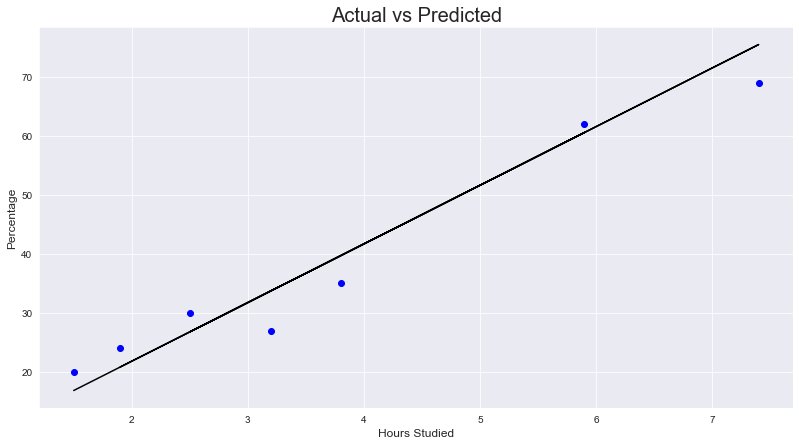

In [42]:
plt.scatter(x=val_x, y=val_y, color='blue')
plt.plot(val_x, prediction_y, color='Black')
plt.rcParams["figure.figsize"] = (13.5,8)

plt.title('Actual vs Predicted', size=24)
plt.ylabel('Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

### Evaluation of model

In [47]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,prediction_y))

Mean absolute error:  4.130879918502486


#### Such a small value of mean absolute error means that the chances of error or making wrong prediction through the model is very less.

### Q. What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?¶

In [45]:
hrs = [9.25]
ans = regression.predict([hrs])
print("Predicted score = {}".format(round(ans[0],3)))

Predicted score = 93.893


#### Thus according to the regression model, if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

## THANK YOU